<b>Home advantage for host countries in wining medals</b>

We are using the Olymoics dataset for our project

Problem Statement: Olympics stated more than 100 years, we would like to analyses to understand how the countries participation increased, how different disciplines added or removed from the games and finally how is male & female ration country wise and in total.

1 Summer Olympics dataset contatins every event data since 1896 to 2012 by discipline, country code, events.
2 We are loading country data to map country code to get the actual country name.

<b>Loading the CSV files for Olympic dataSet</b>

In [2]:
import pandas as pd

SOdf = pd.read_csv(r"summer olympics.csv", engine='python')
SOdf.head()


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [2]:
SOdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Obervation : there are total 31164 rows data and 9 columns. only one column is int and rest of them are object , this data set has categorical data

In [29]:
SOdf.groupby('Sport').Discipline.unique()

Sport
Aquatics             [Swimming, Water polo, Diving, Synchronized S....
Archery                                                      [Archery]
Athletics                                                  [Athletics]
Badminton                                                  [Badminton]
Baseball                                                    [Baseball]
Basketball                                                [Basketball]
Basque Pelota                                          [Basque Pelota]
Boxing                                                        [Boxing]
Canoe                                     [Canoe Slalom, Canoe Sprint]
Canoe / Kayak                       [Canoe / Kayak F, Canoe / Kayak S]
Cricket                                                      [Cricket]
Croquet                                                      [Croquet]
Cycling              [Cycling Road, Cycling Track, Mountain Bike, B...
Equestrian                     [Jumping, Dressage, Eventing, Vaulting]


Observation:Canoe found in 2 different sport events

Observation: Aquatics & Wrestling  had many disciplines need to analyze and Volleybal has some typo for Beach volley., Beach Volleyball

Pands-profiling is not working, doing data validation column by column

In [40]:
SOdf.Country.unique()

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

Observation: We had noticed country Code as nan, this need to be replaced with actual country code.

In [72]:
SOdf[SOdf['Country'].isnull() ==True]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver



Observation: Athlete and Country values are not correct, collect correct values from google and update them.

<b> Updating the Country and Athlete names in data frame SOdf </b>

In [3]:
SOdf.ix[[29603],'Country']  ='BRN'
SOdf.ix[[29603],'Athlete']  ='ARYAM YUSUF JAMA'
SOdf.ix[[31072],'Country']  ='CAN'
SOdf.ix[[31072],'Athlete']  ='CHRISTINE GIRARD'
SOdf.ix[[31091],'Country']  ='IRI'
SOdf.ix[[31091],'Athlete']  ='SAEID MOHAMMADPOURKARKARAGH'
SOdf.ix[[31110],'Country']  ='RUS' 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package s

<b>Verifying the country data after update.</b>

In [74]:
SOdf[SOdf['Country'].isnull() ==True]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


<b> Load the country data to get the actual country name from country code</b>

In [7]:
Cdf = pd.read_excel(r"Country_final.xls")
Cdf.head()

,County Code,Country Name
0,AFG,Afghanistan
1,ALG,Algeria
2,ARG,Argentina
3,ARM,Armenia
4,ANZ,Australasia


Merge the country and olympics data to get the Country Name

In [8]:
df_merge = pd.merge(SOdf, Cdf, how='inner', left_on='Country', right_on='County Code').drop(['Country'],1) 

Rename the Name to Country 

In [28]:
#df_merge.rename(columns ={'Name':'Country'},inplace=True)
df_merge[df_merge['Year'] ==2012]['Gender'].value_counts().unstack().fillna(0).plot(kind='bar')

Men      1025
Women     924
Name: Gender, dtype: int64

Observation : Merged data set has 31165 rows and 10 columns

In [116]:
 Year_countrydf.get_group('1896')

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [41]:
SOdf.Medal.unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [43]:
SOdf.Event.unique()

array(['100M Freestyle', '100M Freestyle For Sailors', '1200M Freestyle',
       '400M Freestyle', '100M', '110M Hurdles', '1500M', '400M', '800M',
       'Discus Throw', 'High Jump', 'Long Jump', 'Marathon', 'Pole Vault',
       'Shot Put', 'Triple Jump', 'Individual Road Race', '100KM', '10KM',
       '12-Hour Race', '1KM Time Trial', 'Sprint Indivual',
       'Foil Individual', 'Foil, Masters', 'Sabre Individual',
       'Horizontal Bar', 'Parallel Bars', 'Pommel Horse', 'Rings',
       'Rope Climbing', 'Team, Horizontal Bar', 'Team, Parallel Bars',
       'Vault', '25M Army Pistol', '25M Rapid Fire Pistol (60 Shots)',
       '50M Pistol (60 Shots)', 'Army Rifle, 200M', 'Army Rifle, 300M',
       'Doubles', 'Singles', 'Heavyweight - One Hand Lift',
       'Heavyweight - Two Hand Lift', 'Open Event', '1500M Freestyle',
       '200M Backstroke', '200M Freestyle', '200M Obstacle Event',
       '200M Team Swimming', '4000M Freestyle', 'Underwater Swimming',
       'Water Polo', 'Au Chap

In [69]:
SOdf.groupby(['Year','Country'])['Medal'].value_counts().unstack().fillna(0)

Medal         Bronze   Gold  Silver
Year Country                       
1896 AUS         0.0    2.0     0.0
     AUT         2.0    2.0     1.0
     DEN         3.0    1.0     2.0
     FRA         2.0    5.0     4.0
     GBR         2.0    2.0     3.0
...              ...    ...     ...
2012 UGA         0.0    1.0     0.0
     UKR        12.0    9.0     4.0
     USA        46.0  147.0    57.0
     UZB         2.0    1.0     0.0
     VEN         0.0    1.0     0.0

[1157 rows x 3 columns]

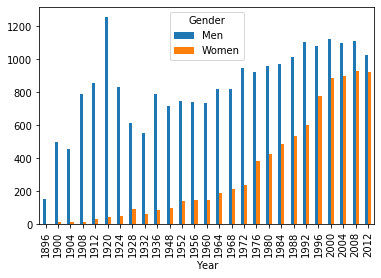

In [124]:
SOdf.groupby(['Year'])['Gender'].value_counts().unstack().fillna(0).plot(kind='bar')

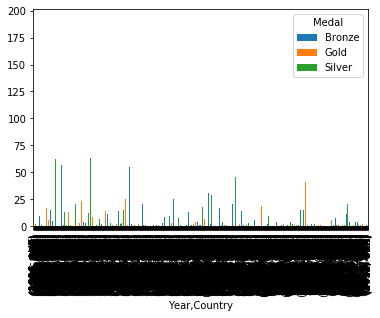

In [109]:
SOdf.groupby(['Year','Country'])['Medal'].value_counts().unstack().fillna(0).plot(kind='bar')

AttributeError: 'DataFrameGroupBy' object has no attribute 'counts'

In [9]:
!pip install pandas-profiling --upgrade  

  Using cached https://files.pythonhosted.org/packages/03/cf/b8cef2778104dc5d319f36dd836efaceb07a037cbf63f27c966b5a193ce9/phik-0.9.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/64/dc/6f35f114844fb12e38d60c4f3d2441a55baff7043ad4e013777dff55746c/pytest_pylint-0.14.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6d/6f/c67eed763bcc095d9187c7a04fdc3ba640d1e990368acfcb1d294ff71549/typed_ast-1.4.1-cp37-cp37m-win_amd64.whl
  Found existing installation: joblib 0.13.2
    Uninstalling joblib-0.13.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-0.13.2-py3.7.egg-info\\dependency_links.txt'
Consider using the `--user` option or check the permissions.



In [18]:
!pip install pandas-profiling --upgrade --user

Requirement already up-to-date: pandas-profiling in c:\users\ggafnn\appdata\roaming\python\python37\site-packages (2.4.0)


In [23]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(SOdf)

ModuleNotFoundError: No module named 'pandas_profiling'

In [25]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --user

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Using cached https://files.pythonhosted.org/packages/02/d0/1e8e60e61e748338e3a40e42f5dfeee63ccdecfc4f0894122b890bfb009a/pandas-0.25.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/27/24/4f35961e5c669e96f6559760042a55b9bcfcdb82b9bdb3c8753dbe042e35/Jinja2-2.11.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/ad/24a16fa4ba612fb96a3c4bb115a5b9741483f53b66d3d3afd987f20fa227/phik-0.9.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f4/b9/d2a9dbab73995639969f5cf3e6acc646371da65a0fdc3f61cac5bb2c98e4/astropy-4.0-cp37-cp37m-win_amd64.whl
  Created wheel for pandas-profiling: filename=pandas_profiling-2.4.1-py2.py3-none-any.whl size=209545 sha256=3e6ed8c1706495a6fd0a805f6f4680da23c4abdf4967218cc290ab44d13e5b1e
  Stored in directory: C:\Users\GGAFNN\AppData\Local\Temp\pip-ephem-wheel-cache-zxzauq4s\wheels\56\c2\dd\8d945b

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:
import pandas_profiling   

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
profile.to_file("SOdf_pre_profiling.html") 

info function gives us the following insights into the SOdf dataframe:

◾There are a total of 31165 samples (rows) and 9 columns in the dataframe.

◾There is 1 columns with a numeric datatype and 8 columns with an object datatype.

◾There are 0 missing values in the data


Checking the wong data into the country and we also noticed the Athlete name not write for few rows

In [45]:
SOdf[SOdf['Country'].isnull() ==True]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [46]:
SOdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [59]:
SOdf.ix[[29603],'Country']  ='BRN'
SOdf.ix[[29603],'Athlete']  ='ARYAM YUSUF JAMA'
SOdf.ix[[31072],'Country']  ='CAN'
SOdf.ix[[31072],'Athlete']  ='CHRISTINE GIRARD'
SOdf.ix[[31091],'Country']  ='IRI'
SOdf.ix[[31091],'Athlete']  ='SAEID MOHAMMADPOURKARKARAGH'
SOdf.ix[[31110],'Country']  ='RUS' 


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removin

In [64]:
SOdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 29603 to 31110
Data columns (total 9 columns):
Year          4 non-null int64
City          4 non-null object
Sport         4 non-null object
Discipline    4 non-null object
Athlete       4 non-null object
Country       4 non-null object
Gender        4 non-null object
Event         4 non-null object
Medal         4 non-null object
dtypes: int64(1), object(8)
memory usage: 480.0+ bytes


<b>Loading the Country dataset</b>

In [12]:
Cdf = pd.read_excel(r"Country.xlsx")
Cdf.head()

,ISO2,Code,Name
0,AF,AFG,Afghanistan
1,AL,ALB,Albania
2,DZ,DZA,Algeria
3,AS,ASM,American Samoa
4,AD,AND,Andorra


In [14]:
 Cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 3 columns):
ISO2    297 non-null object
Code    298 non-null object
Name    298 non-null object
dtypes: object(3)
memory usage: 7.1+ KB


info function gives us the following insights into the  Cdf dataframe:

◾There are a total of 298 samples (rows) and 3 columns in the dataframe.

◾There are 3 columns with an object datatype.

◾There are 1 missing values in the data ISO coulmn


•We are going to perform a merge on the two dataframes, SOdf and Cdf on the basis of Country of SOdf and Code column of Cdf dataframe to create a new dataframe df_merge, to perform our EDA on single dataframe.

In [62]:
df_merge = pd.merge(SOdf, Cdf, how='inner', left_on='Country', right_on='Code').drop(['Country'],1)
df_merge.rename(columns ={'Name':'Country'},inplace=True)
df_merge.tail()

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,ISO2,Code,Country
0,2012,London,Athletics,Athletics,ARYAM YUSUF JAMA,Women,1500M,Gold,BN,BRN,Brunei Darussalam
1,2012,London,Weightlifting,Weightlifting,CHRISTINE GIRARD,Women,63KG,Gold,CA,CAN,Canada
2,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",Men,Wf 60 KG,Silver,RU,RUS,Russian Federation (the)


In [63]:
df_merge.tail()

,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,ISO2,Code,Country
0,2012,London,Athletics,Athletics,ARYAM YUSUF JAMA,Women,1500M,Gold,BN,BRN,Brunei Darussalam
1,2012,London,Weightlifting,Weightlifting,CHRISTINE GIRARD,Women,63KG,Gold,CA,CAN,Canada
2,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",Men,Wf 60 KG,Silver,RU,RUS,Russian Federation (the)


Checking wrong data into the country column

In [36]:
SOdf[SOdf['Country'].isnull() ==True]
'df.reset_index()
'df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [39]:

df.iloc[0]['Country']='BRN'
df.iloc[0]['Athlete']='ARYAM YUSUF JAMA'
df.iloc[1]['Country']='CAN'
df.iloc[1]['Athlete']='CHRISTINE GIRARD'
df.iloc[2]['Country']='IRI'
df.iloc[2]['Athlete']='SAEID MOHAMMADPOURKARKARAGH'
df.iloc[3]['Country']='RUS'


nan

In [39]:
SOdf = df[df['Athlete'] =='Pending']
mdf

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver


In [35]:
dfg = df.groupby('Year')

In [37]:
dfg.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
29216,2012,London,Aquatics,Diving,"BOUDIA, David",USA,Men,10M Platform,Gold
29217,2012,London,Aquatics,Diving,"QIU, Bo",CHN,Men,10M Platform,Silver
29218,2012,London,Aquatics,Diving,"DALEY, Thomas",GBR,Men,10M Platform,Bronze
29219,2012,London,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10M Platform,Gold
